# Lab 4

## 1)a) Ajuste lineal por cuadrados mínimos

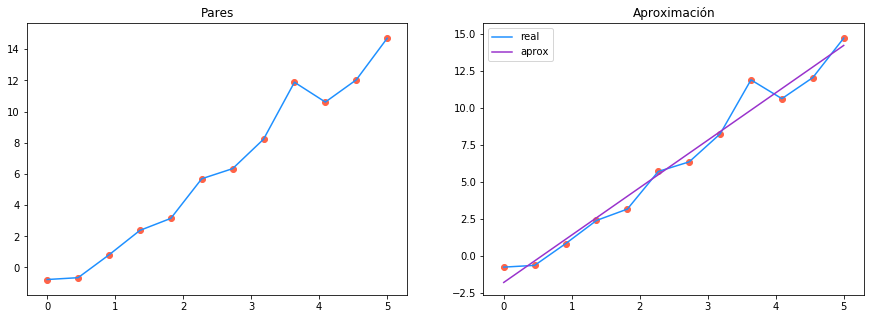

In [29]:
import glm  # fuck you numpy and your lineal algebra
import matplotlib.pyplot as plt
import numpy as np

rawList = np.loadtxt("Data/datos1a.dat")
xList , yList= rawList[0,:], rawList[1,:] 


def linealAjustment(listX,listY): # We shall do it with the matrix formula...
    assert listX.size == listY.size
    o0 = listX.size # sum(xi^0)
    o1 = np.sum(listX) # sum(xi^1)
    o2 = np.sum(listX**2) # sum(xi^2)
    o0y = sum(listY) #sum(xi^0 * yi)
    o1y = sum(listX*listY) #sum(xi^1 * yi)
    # B = A^(-1) * C
    A = glm.mat2(o0,o1,o1,o2) 
    C = glm.vec2(o0y,o1y)
    A = glm.inverse(A)
    B  = A * C
    return lambda k: B.x + B.y *k

adjust = linealAjustment(xList, yList)
Y_pred = adjust(xList)

f, ax = plt.subplots(1, 2, figsize=(15, 5))

# pares
ax[0].set_title('Pares')
ax[0].plot(xList, yList, color='dodgerblue')
ax[0].scatter(xList, yList, color='tomato')

# aprox
ax[1].set_title('Aproximación')
ax[1].plot(xList, yList, color='dodgerblue', label='real')
ax[1].scatter(xList, yList, color='tomato')
ax[1].plot(xList, Y_pred, color='darkorchid', label='aprox')
ax[1].legend()

plt.show()

## 1)b)

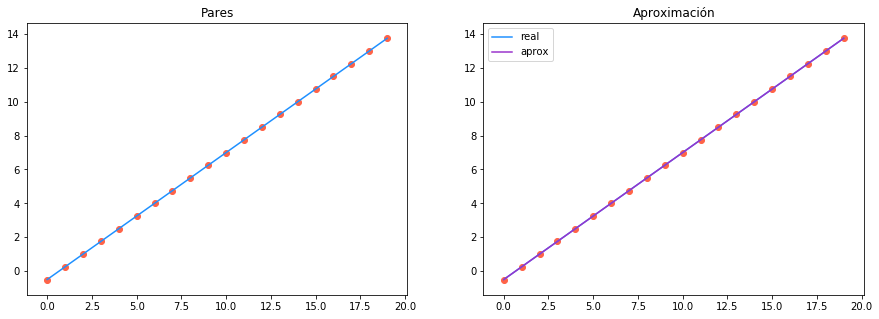

In [30]:
def unoA():
    xList = [float(i) for i in range(20)]
    yList = [((3/4)*i-0.5) for i in range(20)]
    
    adjust = linealAjustment(np.array(xList), np.array(yList))
    Y_pred = adjust(np.array(xList))
    
    f, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    # pares
    ax[0].set_title('Pares')
    ax[0].plot(xList, yList, color='dodgerblue')
    ax[0].scatter(xList, yList, color='tomato')
    
    # aprox
    ax[1].set_title('Aproximación')
    ax[1].plot(xList, yList, color='dodgerblue', label='real')
    ax[1].scatter(xList, yList, color='tomato')
    ax[1].plot(xList, Y_pred, color='darkorchid', label='aprox')
    ax[1].legend()
     
    plt.show()
unoA()
